In [1]:
# Import the custom analysis module with forced reload
import importlib
import sys

# Remove from cache if it exists and force reload
if 'leveraged_lp_analysis' in sys.modules:
    del sys.modules['leveraged_lp_analysis']

# Fresh import
from source.leveraged_lp_analysis import LeveragedLPAnalyzer, create_position_config

print(" Module reloaded with breakeven line functionality!")

 Module reloaded with breakeven line functionality!


--- Leveraged LP Position Analysis ---
Initial Equity: $4,500.00 (1 ETH + $0 USDC)
Leverage: 6.0x
Total Position Value: $27,000.00
--------------------------------------------------
LP Position at Current Price ($4,500):
  - ETH: 2.966849 ($13,350.82)
  - USDC: $13,649.18
  - Total: $27,000.00
  - Liquidity (L): 18,209.99
--------------------------------------------------
Debt (ETH):
  - Amount: 5.000000 ETH
  - Value: $22,500.00
LP Range: $4,400 - $4,600
--------------------------------------------------
Position Verification at Current Price:
  - LP Value: $27,000.00
  - Final Equity: $4,500.00
  - Expected Equity: $4,500.00
  - ✅ Equity matches expectation
--------------------------------------------------

--- PnL at Key Price Points ---

Lower Band (ETH = $4,400):
  LP Value: $26,550.81
  Final Equity: $4,550.81
  P&L: $50.81 (+1.13%)
  Impermanent Loss: $150.81

Current Price (ETH = $4,500):
  LP Value: $27,000.00
  Final Equity: $4,500.00
  P&L: $0.00 (+0.00%)
  Impermanent Loss

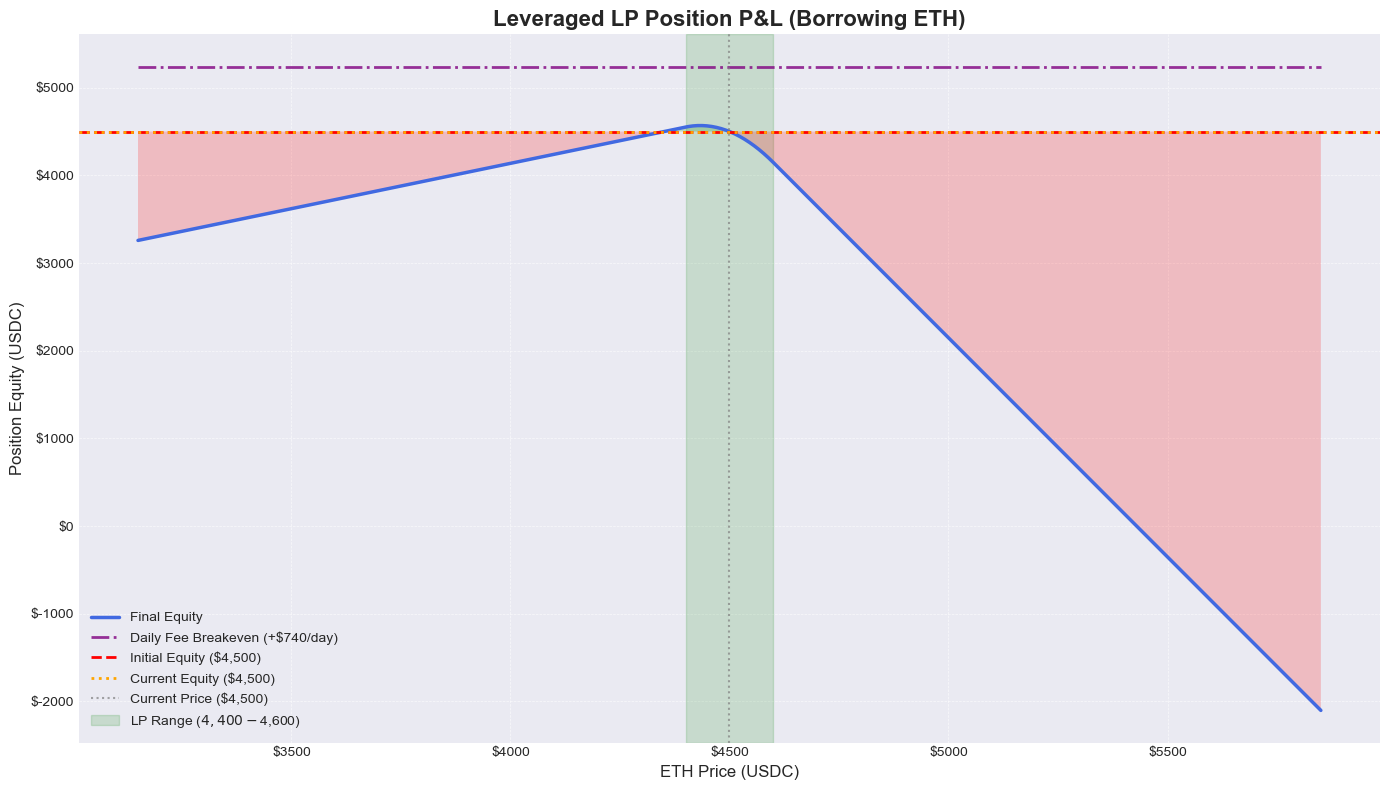

In [2]:
# =============================================================================
# SCENARIO 1: ETH POSITION ANALYSIS
# =============================================================================

# Initialize the analyzer
analyzer = LeveragedLPAnalyzer()

# Configure ETH position parameters
eth_config = create_position_config(
    current_price=4500.0,
    range_lower=4400.0,
    range_upper=4600.0,
    initial_eth=1,
    initial_usdc=0,
    leverage=6.0,
    borrow_type='ETH',
    apr_percent=1000.0
)

# Run analysis and display results
eth_results = analyzer.calculate_position_analysis(eth_config)

if eth_results:
    analyzer.print_analysis_summary(eth_config, eth_results)
    analyzer.plot_individual_position(eth_config, eth_results)

--- Leveraged LP Position Analysis ---
Initial Equity: $2,544.00 (0 ETH + $2544 USDC)
Leverage: 6.0x
Total Position Value: $15,264.00
--------------------------------------------------
LP Position at Current Price ($4,500):
  - ETH: 1.677259 ($7,547.66)
  - USDC: $7,716.34
  - Total: $15,264.00
  - Liquidity (L): 10,294.71
--------------------------------------------------
Debt (USDC):
  - Amount: $12,720.00 USDC
LP Range: $4,400 - $4,600
--------------------------------------------------
Position Verification at Current Price:
  - LP Value: $15,264.00
  - Final Equity: $2,544.00
  - Expected Equity: $2,544.00
  - ✅ Equity matches expectation
--------------------------------------------------

--- PnL at Key Price Points ---

Lower Band (ETH = $4,400):
  LP Value: $15,010.06
  Final Equity: $2,290.06
  P&L: $-253.94 (-9.98%)
  Impermanent Loss: $-253.94

Current Price (ETH = $4,500):
  LP Value: $15,264.00
  Final Equity: $2,544.00
  P&L: $0.00 (+0.00%)
  Impermanent Loss: $0.00

Upper

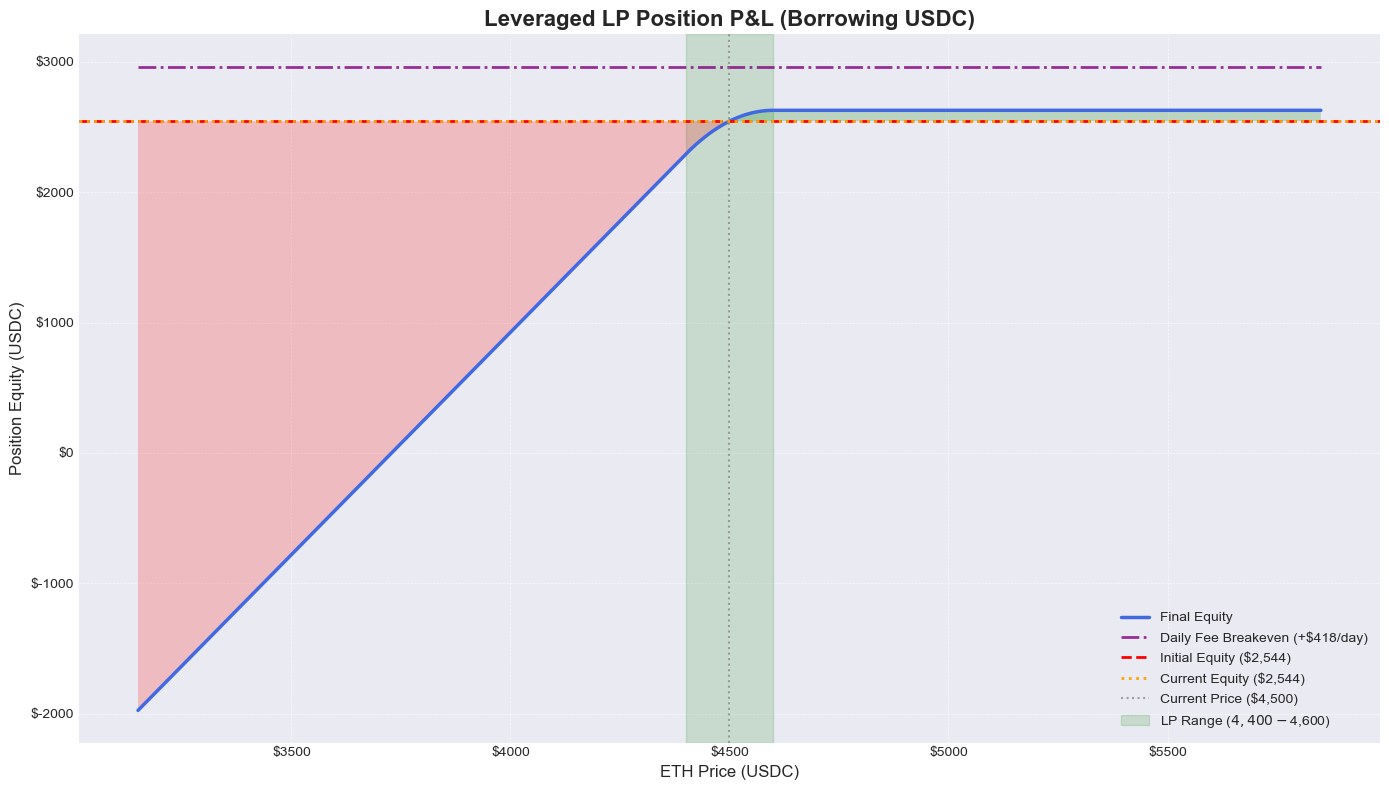

In [3]:
# =============================================================================
# SCENARIO 2: USDC POSITION ANALYSIS
# =============================================================================

# Configure USDC position parameters
usdc_config = create_position_config(
    current_price=4500.0,
    range_lower=4400.0,
    range_upper=4600.0,
    initial_eth=0,
    initial_usdc=2544,
    leverage=6.0,
    borrow_type='USDC',
    apr_percent=1000.0
)

# Run analysis and display results
usdc_results = analyzer.calculate_position_analysis(usdc_config)

if usdc_results:
    analyzer.print_analysis_summary(usdc_config, usdc_results)
    analyzer.plot_individual_position(usdc_config, usdc_results)

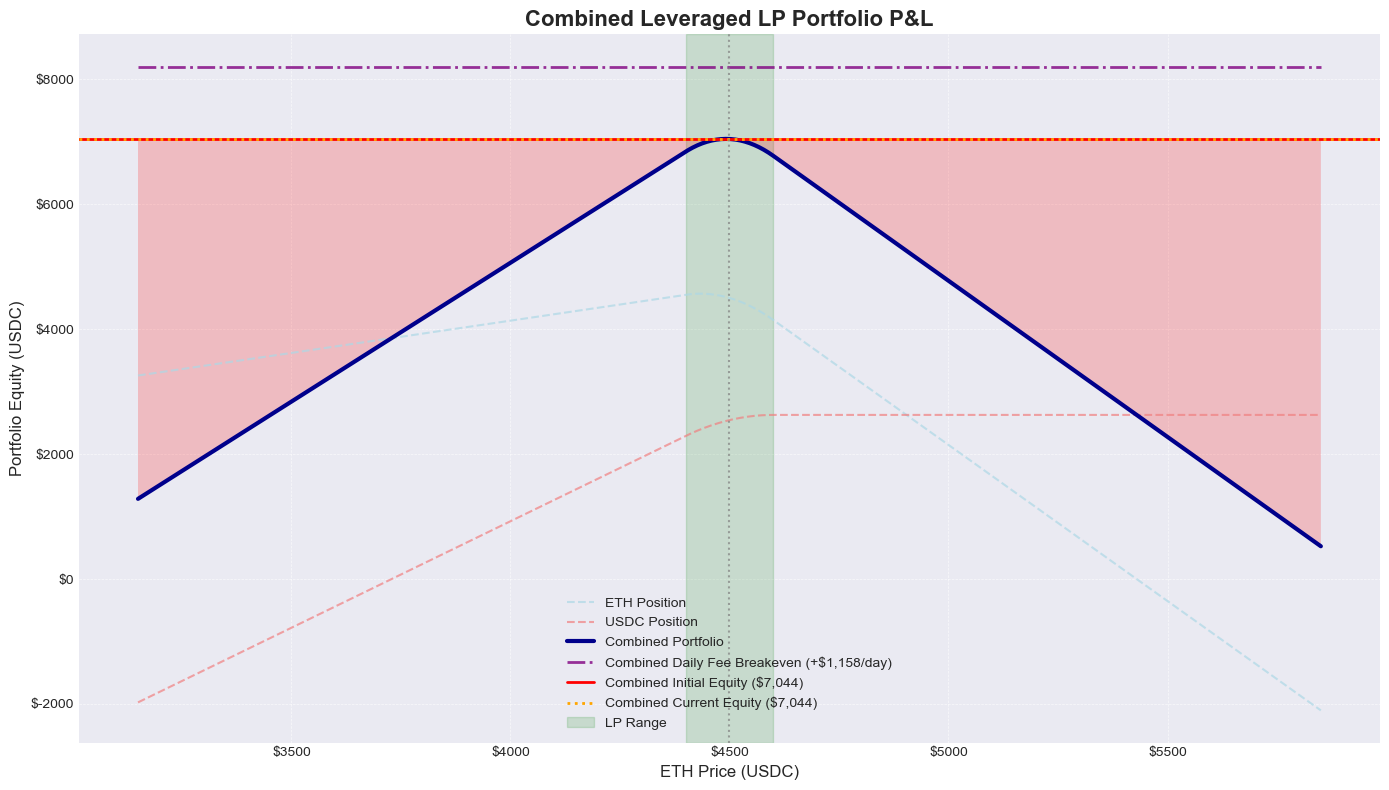

COMBINED PORTFOLIO ANALYSIS
Total Initial Equity: $7,044.00
Total Position Value: $42,264.00
Combined Leverage: 6.0x
------------------------------------------------------------
Position 1: 1 ETH → ETH leverage
Position 2: $2544 USDC → USDC leverage
------------------------------------------------------------
Combined Portfolio Scenarios:
  Lower Band   ($4400): $   6,841 ( -2.88%)
  Current      ($4500): $   7,044 ( +0.00%)
  Upper Band   ($4600): $   6,775 ( -3.82%)
  -10%         ($4050): $   5,285 (-24.97%)
  +10%         ($4950): $   5,025 (-28.66%)


In [4]:
# =============================================================================
# SCENARIO 3: COMBINED POSITIONS ANALYSIS
# =============================================================================

# Run combined analysis and visualization
analyzer.plot_combined_positions(eth_config, usdc_config)